# Análise exploratória de dados

## 1. Descrição dos dados

### 1.1. Leitura do conjunto de dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
colors = #["#20B2AA", "#B22028"]
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))

SyntaxError: invalid syntax (3682833210.py, line 1)

In [4]:
caminho = '../data/raw/Orange Quality Data.csv'
laranjas = pd.read_csv(caminho) #Obtendo o dataset

laranjas

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


### 1.2. Dicionário de dados

In [11]:
caminho_dic = '../data/external/dicionario.csv'
dicionario = pd.read_csv(caminho_dic) #Obtendo o dataset

dicionario

,variavel,descrição,tipo,subtipo
0,Size,Tamanho da fruta em cm,Quantitativa,Contínua
1,Weight,Peso da fruta em g,Quantitativa,Contínua
2,Brix,Nível de doçura,Quantitativa,Contínua
3,pH,Nível de acidez em pH,Quantitativa,Contínua
4,Softness,Maciez de 1-5,Qualitativa,Ordinal
5,HarvestTime,Dias desde a colheita,Quantitativa,discreta
6,Ripeness,Maduração de 1-5,Qualitativa,Ordinal
7,Color,Cor da laranja,Qualitativa,Nominal
8,Variety,Variedade da laranja,Qualitativa,Nominal
9,Blemishes,Defeito,Qualitativa,Nominal


---


Este dataset apresenta .....

## 2. Perguntas de partida e hipóteses

(perguntas de partida de hipótese
- Qual a relação da maduração com o tempo de colheita?

- Qual é a relação do tipo de laranja com a doçura?

- Existe alguma relação de tamanho com macieis e doçura?

- As laranjas mais macias são mais fáceis de ter danos?

- Existe um tipo de laranja mais resistente a danos?

- A cor tem algum tipo de influencia na qualidade da laranja?

- Que conjunto de informações fazem a qualidade da laranja ser melhor?

**Dados Faltantes**

In [13]:
laranjas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [14]:
qtd_nulos = laranjas.isnull().sum()
qtd_nulos

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

**Distribuição dos dados (variável por variável)**

In [16]:
laranjas.describe(include='all')

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241,241,241,241.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,24,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deep Orange,Cara Cara,N,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,21,149,NaN
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,NaN,NaN,NaN,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,NaN,NaN,NaN,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,NaN,NaN,NaN,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,NaN,NaN,NaN,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,NaN,NaN,NaN,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,NaN,NaN,NaN,4.500000


In [21]:
blemishes_yes = laranjas[laranjas["Blemishes (Y/N)"].str.contains("y", case=False)]

blemishes_unique = blemishes_yes["Blemishes (Y/N)"].unique()

blemishes_unique

array(['Y (Minor)', 'Y (Sunburn)', 'Y (Mold Spot)', 'Y (Bruise)',
       'Y (Split Skin)', 'Y (Sunburn Patch)', 'Y (Scars)',
       'Y (Minor Insect Damage)', 'Y (Bruising)'], dtype=object)

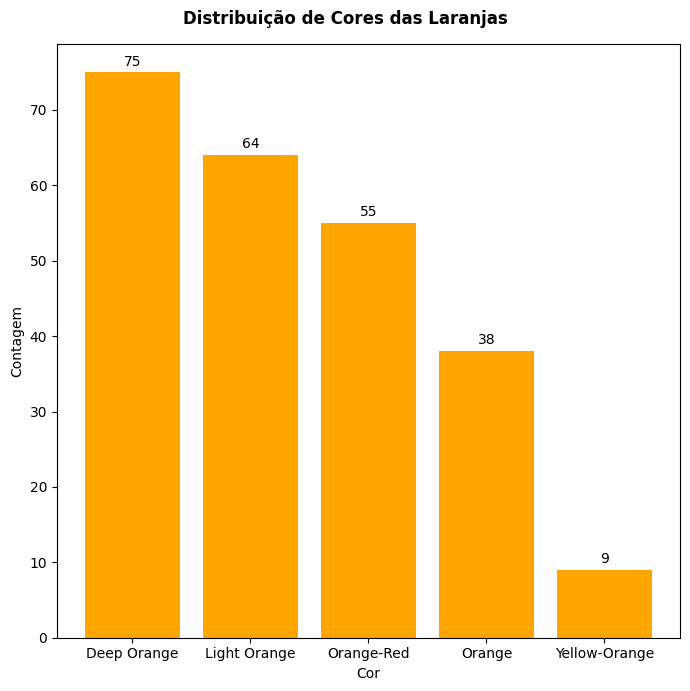

In [5]:
# Contagem de cada cor
color_counts = laranjas['Color'].value_counts()

# Plotando a distribuição das cores
plt.figure(figsize=(7,7))
plt.suptitle('Distribuição de Cores das Laranjas', fontweight='bold')

# Gráfico de barras
bars = plt.bar(color_counts.index, color_counts.values, color='orange')

# Adicionando rótulos
plt.xlabel('Cor')
plt.ylabel('Contagem')

# Adicionando os valores acima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()

# Exibindo o gráfico
plt.show()

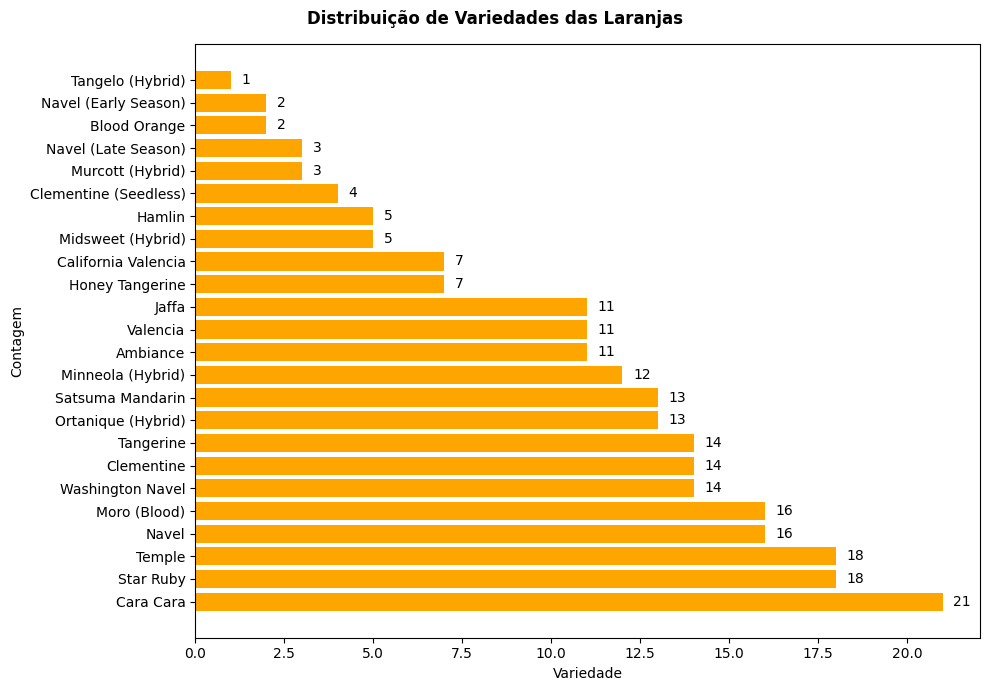

In [6]:
# Contagem de cada Variedade de laranja
variety_counts = laranjas['Variety'].value_counts()

# Plotando a distribuição das variedades
plt.figure(figsize=(10,7))
plt.suptitle('Distribuição de Variedades das Laranjas', fontweight='bold')

# Gráfico de barras
bars = plt.barh(variety_counts.index, variety_counts.values, color='orange')

# Adicionando rótulos
plt.xlabel('Variedade')
plt.ylabel('Contagem')

# Adicionando os valores acima de cada barra
for bar in bars:
    yval = bar.get_width()
    plt.text(yval + 0.3, bar.get_y() + bar.get_height()/2, int(yval), va='center')

plt.tight_layout()

# Exibindo o gráfico
plt.show()

## 3. Insights